In [1]:
pip install wikipedia-api


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


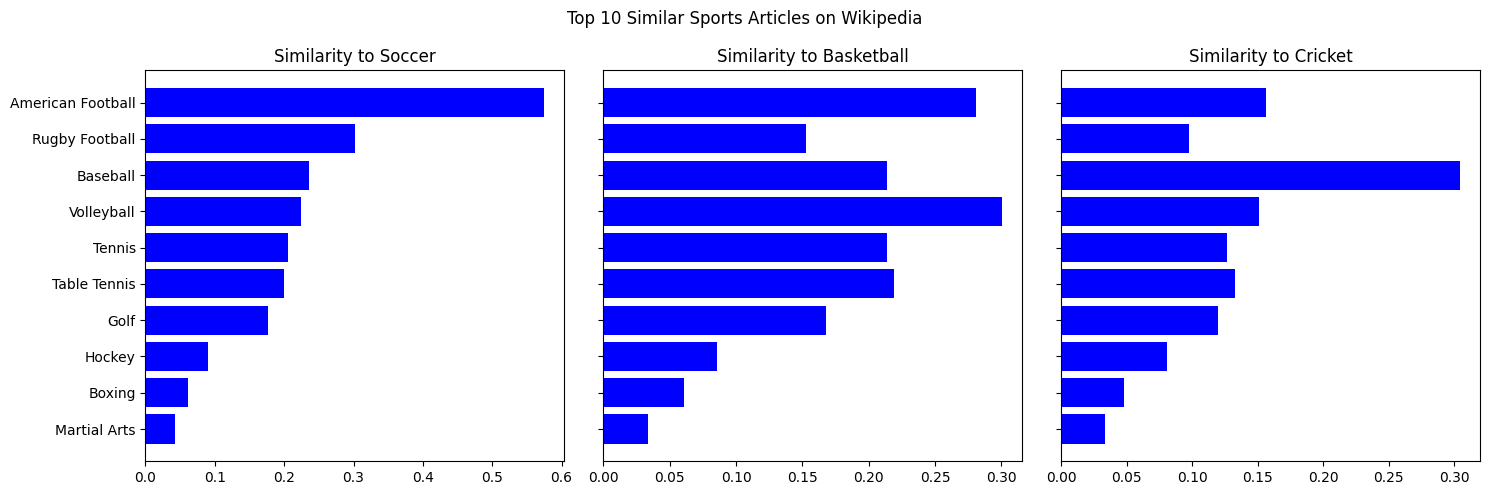

In [2]:
import wikipediaapi
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
wiki_wiki = wikipediaapi.Wikipedia(
    language='en',
    user_agent='MyCustomUserAgent/1.0 (myemail@example.com)'
)
def get_wiki_page_content(title):
    page = wiki_wiki.page(title)
    return page.text if page.exists() else ""
query_titles = ["Soccer", "Basketball", "Cricket"]
comparison_titles = ["Baseball", "American Football", "Hockey", "Tennis", "Golf", 
                     "Rugby Football", "Volleyball", "Table Tennis", "Boxing", "Martial Arts"]
query_content = [get_wiki_page_content(title) for title in query_titles]
comparison_content = [get_wiki_page_content(title) for title in comparison_titles]
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(query_content + comparison_content)
cosine_similarities = cosine_similarity(tfidf_matrix[:len(query_content)], tfidf_matrix[len(query_content):])
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for i, title in enumerate(query_titles):
    similarity_scores = cosine_similarities[i]
    sorted_indices = similarity_scores.argsort()[::-1]
    top_indices = sorted_indices[:10]
    top_titles = [comparison_titles[j] for j in top_indices]
    top_scores = similarity_scores[top_indices]
    ax[i].barh(top_titles, top_scores, color='blue')
    ax[i].set_title(f'Similarity to {title}')
    ax[i].invert_yaxis()
plt.suptitle('Top 10 Similar Sports Articles on Wikipedia')
plt.tight_layout()
plt.show()